In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Importing Python scripts
import smoothing as sm
import edge_detector as ed
#import opticalflowlk as op
import mklHarris as harris

%matplotlib inline

# Importing the initial images

In [2]:
#img = cv2.imread("ball.jpg", cv2.IMREAD_GRAYSCALE)
#img1 = cv2.imread("ball1.jpg", cv2.IMREAD_GRAYSCALE)
#img2 = cv2.imread("ball2.jpg", cv2.IMREAD_GRAYSCALE)

img1 = cv2.imread("square2/square2-0.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("square2/square2-1.png", cv2.IMREAD_GRAYSCALE)

fig1 = cv2.GaussianBlur(img1, (5, 5), 0).astype('int16')
fig2 = cv2.GaussianBlur(img2, (5, 5), 0).astype('int16')

## Smoothing the images

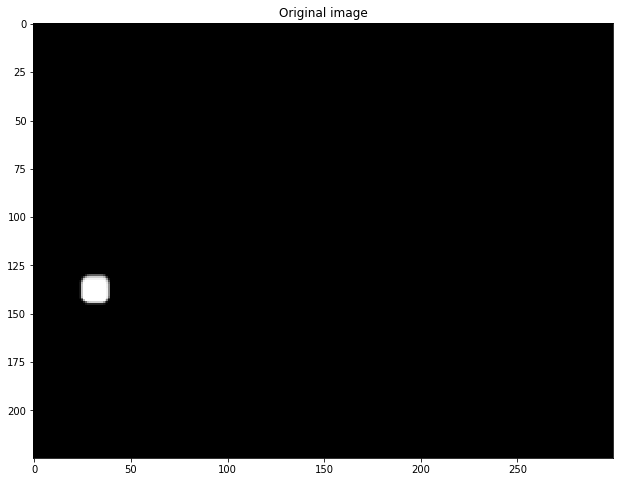

In [3]:
fig = plt.figure(figsize = (12, 8))
fig = plt.imshow(img2, cmap = 'gray')
fig = plt.title('Original image')

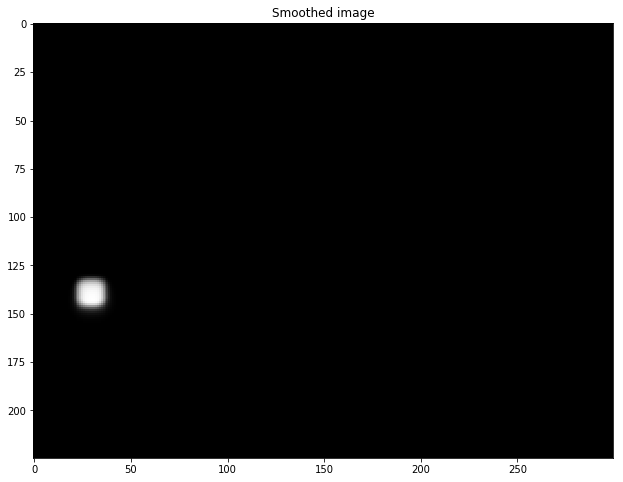

In [4]:
img_1 = sm.smoothing(img1, 2)

fig = plt.figure(figsize = (12, 8))
fig = plt.imshow(img_1, cmap = 'gray')
fig = plt.title('Smoothed image')

## Importing Template

35 35


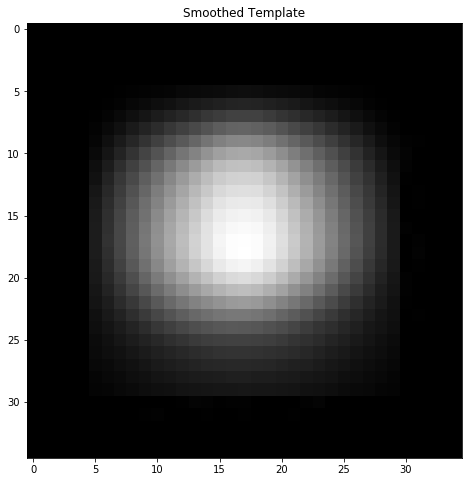

In [5]:
temp = cv2.imread("template-square2.jpg", cv2.IMREAD_GRAYSCALE)

temp = sm.smoothing(temp, 5)

t_height = temp.shape[0]
t_width = temp.shape[1]
print t_height, t_width

fig = plt.figure(figsize = (12, 8))
fig = plt.imshow(temp, cmap = 'gray')
fig = plt.title('Smoothed Template')

## Edge map of the initial image

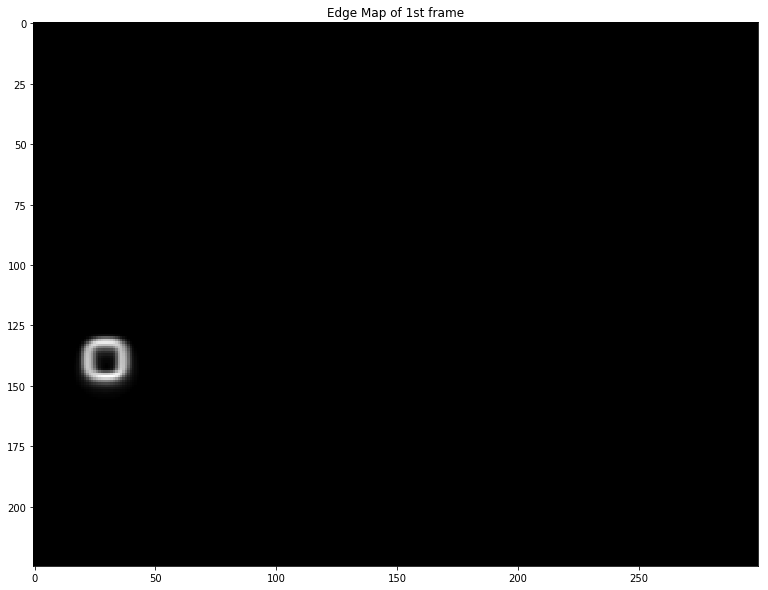

In [6]:
dx, dy, img_d = ed.sobel(img_1)

plt.figure(figsize = (14, 10))
plt.imshow(img_d, cmap = 'gray')
plt.title('Edge Map of 1st frame')

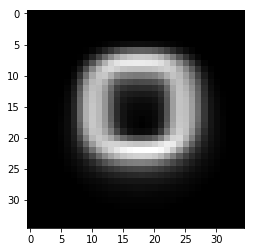

In [12]:
def summation_values(img_d, temp):
    
    height = img_d.shape[0]
    width = img_d.shape[1]

    values = []

    for y in range(height):
        for x in range(width):
            summation = img_d[y:y+t_height, x:x+t_width].sum()
            values.append([y, x, summation])
            
    return values

def get_max_accumulation(img_d, temp):
    # Calling the above function
    values = summation_values(img_d, temp)
    maximum = 0
    idy = []
    idx = []
    
    for i in range(len(values)):
        if values[i][2] > maximum:
            maximum =  values[i][2]

    for i in range(len(values)):
        if values[i][2] == maximum:
            
            idy.append(values[i][0])
            idx.append(values[i][1])
            
    return idx, idy

idx, idy = get_max_accumulation(img_d, temp)

# Getting ideal starting points for the window (using mean of all coordinates which had maximum accumulation)
ideal_y = int(np.mean(idy))
ideal_x = int(np.mean(idx))

plt.imshow(img_d[ideal_y:ideal_y+t_height, ideal_x:ideal_x+t_width], cmap = 'gray')

# Optical Flow

0 3 -3


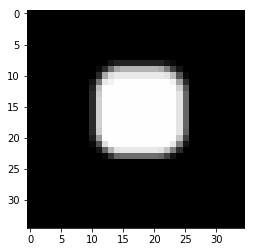

1 3 -3


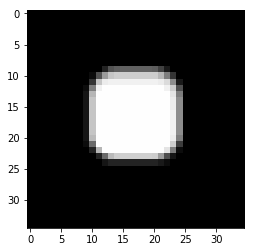

2 3 -2


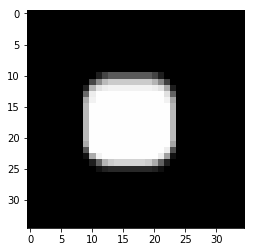

3 2 -2


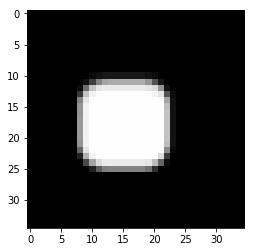

4 2 -1


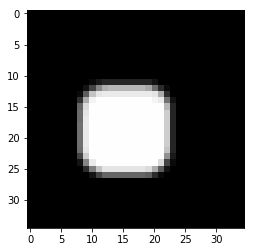

5 3 0


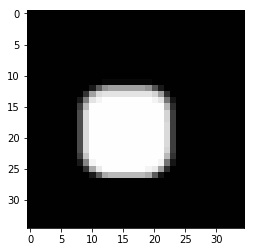

6 3 0


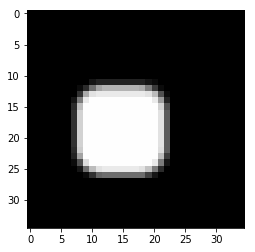

7 3 1


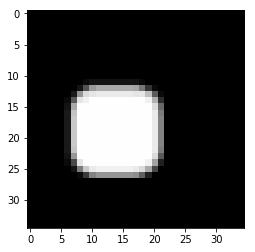

8 3 2


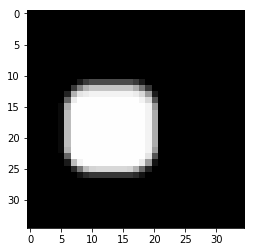

9 3 2


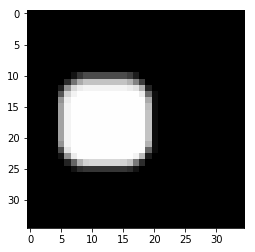

10 1 2


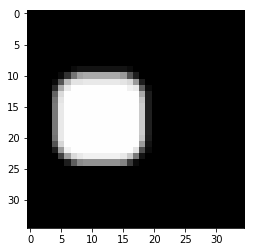

11 2 3


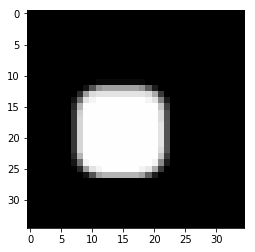

12 2 4


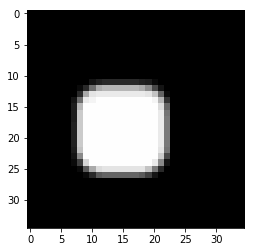

13 2 4


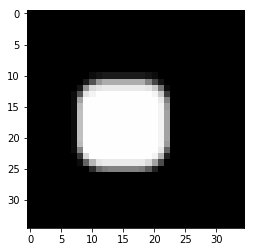

14 2 3


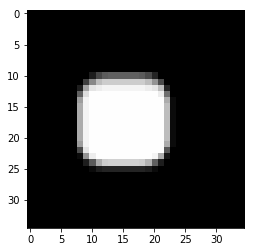

15 2 3


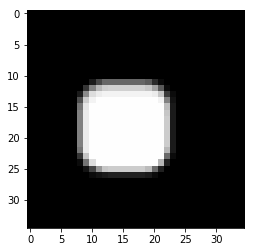

16 2 4


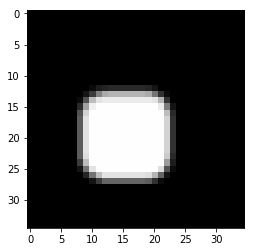

17 1 3


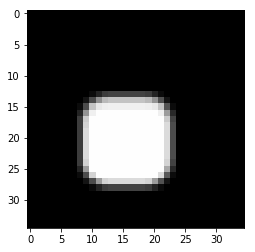

18 2 3


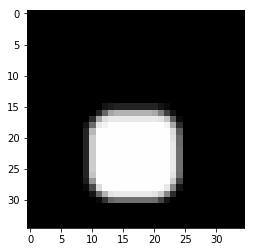

19 2 4


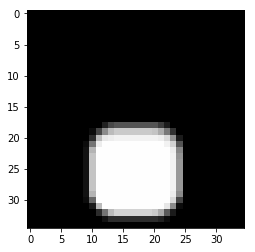

20 2 4


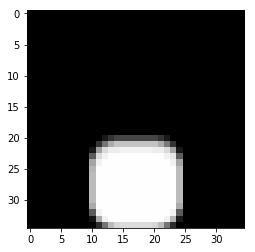

21 1 3


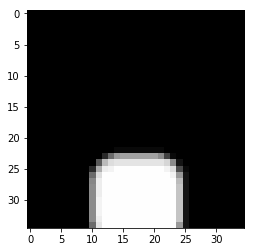

In [11]:
master_v = []

#idy, idx = get_max_accumulation(img_d, temp)
# Getting ideal starting points for the window (using mean of all coordinates which had maximum accumulation)
#ideal_y = int(np.mean(idy))
#ideal_x = int(np.mean(idx))

master_y = 0
master_x = 0

for n in range(22):
    name = "square2"
    img = cv2.imread("{}/{}-{}.png".format(name, name, n))
    
    new_img = img[ideal_y:ideal_y+t_height, ideal_x:ideal_x+t_width]
    
    #cv2.imwrite('{}/sample-{}.png'.format(name, n), new_img)
    plt.imshow(new_img, cmap = 'gray')
    
    v = harris.vector_field(name, n, ideal_x, ideal_y, t_height)

    x, y = v[0][1]
    
    y = int(y)
    x = int(x)
    ideal_y = ideal_y + y
    ideal_x = ideal_x + x
    #ideal_y = ideal_y + y
    #ideal_x = ideal_x + x
    
    print n, x, y
    
    #img = cv2.imread("{}/{}-{}.png".format(name, name, n))
    #plt.imshow(img, cmap = 'gray')
    #cv2.imshow('New_img', new_img)
    
    plt.show()